In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from itertools import product

In [2]:
# https://stackoverflow.com/questions/354038/how-do-i-check-if-a-string-represents-a-number-float-or-int


In [3]:
df= pd.read_csv("modelSeyfertData.csv")

df =df.dropna()
df = df.reset_index()
data=df.to_numpy() 


# 2) Helper Functions

In [4]:
def splitdata_train_test(data, fraction_training):
  
    np.random.seed(0)
    np.random.shuffle(data)
  
    split = int((data.shape[0])*fraction_training)
    training_set = data[:split]
    testing_set = data[split:]
    return training_set, testing_set

In [5]:
def generate_features_targets(data):
  # complete the function by calculating the concentrations
#     print(data[0])
    targets = data[:,2]
#     array([545553, 'Sy1', 'SAB', 0.03664, 16.46, 16.08, 16.047, 15.192,
#        14.626, 14.314, 14.093], dtype=object)
    #Shape as you need
    features = np.empty(shape=(len(data), 7))
#     print(features)
    features[:, 0] = data[:,4]#Redshift
    features[:, 1] = data[:,5]#B Value
    features[:, 2] = data[:,6]#V Value
    features[:, 3] = data[:,7]-data[:,8]#u-g
    features[:, 4] = data[:,8]-data[:,9]#g-r
    features[:, 5] = data[:,9]-data[:,10]#r-i
    features[:, 6] = data[:,10]-data[:,11]#i-z
    return features, targets
# generate_features_targets(data)

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')


In [7]:
def calculate_accuracy(predicted, actual):
    return sum(predicted == actual)/len(actual)

# 3) Decision Tree Model

In [8]:
def dtc_predict_actual(data):
    # split the data into training and testing sets using a training fraction of 0.7
    train_set,test_set=splitdata_train_test(data,0.9)
    # generate the feature and targets for the training and test sets
    # i.e. train_features, train_targets, test_features, test_targets
    train_features, train_targets=generate_features_targets(train_set)
    test_features,test_targets=generate_features_targets(test_set)
    # initialize model
    dtc = DecisionTreeClassifier()
    
    # train the model
    dtc.fit(train_features, train_targets)
    
    # make predictions using the same features
    predictions = dtc.predict(test_features)
    
    # return the predictions and the test_targets
    return predictions, test_targets,dtc


Our accuracy score: 0.7647058823529411
Confusion matrix, without normalization


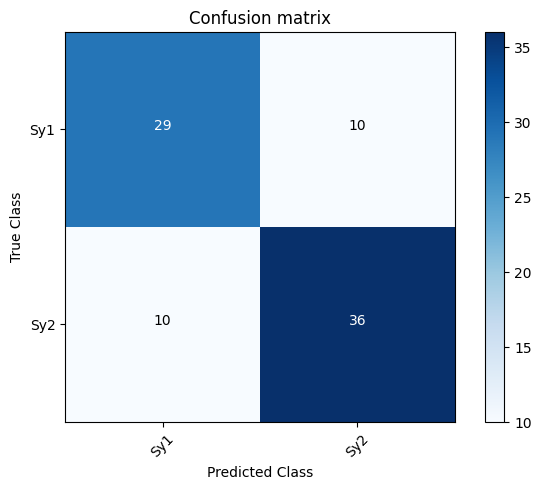

In [9]:
predicted,targets,dtc=dtc_predict_actual(data)

# calculate the model score using your function
model_score = calculate_accuracy(predicted, targets)
print("Our accuracy score:", model_score)
j=model_score
# calculate the models confusion matrix using sklearns confusion_matrix function
class_labels = list(set(targets))
model_cm = confusion_matrix(y_true=targets, y_pred=predicted, labels=class_labels)

# Plot the confusion matrix using the provided functions.
plt.figure()
plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
plt.show()

In [10]:
df.columns[3:6]

# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(dtc, 
#                    feature_names=
#                    class_names=data.target_names,
#                    filled=True)


Index(['morph_type', 'rvz_redshift', 'B'], dtype='object')

# 4) Random Forest Model

In [11]:
def rf_predict_actual(data, n):
    # generate the features and targets
    features,targets =generate_features_targets(data)

    # instantiate a random forest classifier using n estimators
    rfc = RandomForestClassifier(n_estimators=n)
    # get predictions using 10-fold cross validation with cross_val_predict
    predicted = cross_val_predict(rfc, features, targets, cv=10)
    # return the predictions and their actual classes
    return predicted,targets


In [12]:
# https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
def mySecondRandomForest(data,n):
    train_set,test_set=splitdata_train_test(data,0.9)
    train_features, train_targets=generate_features_targets(train_set)
    test_features,test_targets=generate_features_targets(test_set)
    
    clf = RandomForestClassifier(n_estimators = n)  
    
    # Training the model on the training dataset
    # fit function is used to train the model using the training sets as parameters
    clf.fit(train_features, train_targets)

    # performing predictions on the test dataset
    predictions = clf.predict(test_features)
    return predictions,test_targets

Accuracy score: 0.788235294117647
Confusion matrix, without normalization


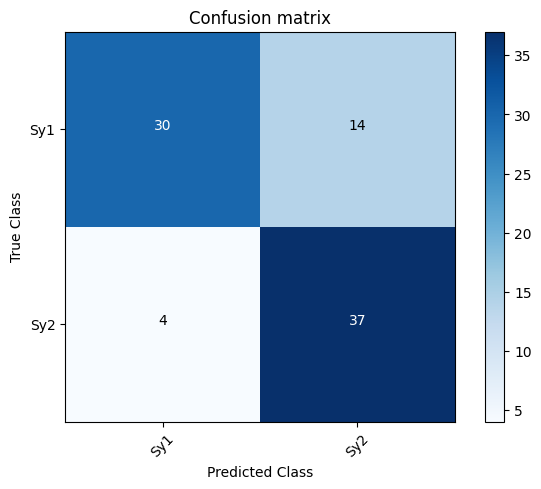

In [13]:
number_estimators =100              # Number of trees
# predicted, actual = rf_predict_actual(data, number_estimators)
predicted,actual=mySecondRandomForest(data,number_estimators)
# calculate the model score using your function
accuracy = calculate_accuracy(predicted, actual)
print("Accuracy score:", accuracy)
k=accuracy
# calculate the models confusion matrix using sklearns confusion_matrix function
class_labels = list(set(actual))
model_cm = confusion_matrix(y_true=actual, y_pred=predicted, labels=class_labels)

# plot the confusion matrix using the provided functions.
plt.figure()
plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
plt.show()

Note:
    Solving the NaN error:https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for
            